In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import glob
import datetime

In [13]:
# credible; makes dictionary of datasets sorted by user (credible), and dataframe of all credible tweets with username as additional column (credible_df) 
df_path = glob.glob('./HealthOrg/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['name','tweet','date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]

    df_ls.append(covid)


healthorg_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in healthorg_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

healthorg_df["date"] = dates


In [14]:
# News_Outlets
df_path = glob.glob('./News_Outlets/*.csv')
news = {}
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['name','tweet', 'date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
    df_ls.append(covid)
    news[path.split('\\')[-1][:-4]] = covid.drop(['name'], axis = 1)

news_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in news_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

news_df["date"] = dates

C:\Users\Jennifer Tramsu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
# Individual
df_path = glob.glob('./Individual/*.csv')
ind = {}
df_ls = []

for path in df_path:
    try:
        df = pd.read_csv(path)
        df = df[['name','tweet','date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
        covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
        df_ls.append(covid)
        news[path.split('\\')[-1][:-4]] = covid.drop(['name'], axis = 1)
    except:
        continue

# other datasets in ./Political/datasets_other_format.txt, dunno how to parse
"""file = open("./Political/datasets_other_format.txt")
other = file.readlines()
other = [name.rstrip() for name in other]"""

ind_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in ind_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

ind_df["date"] = dates

<p> Problem Datasets: </p>

<ul>
<li> kayleighmcenany </li>
<li> LeaderMcConnell </li>
<li> prager </li>
<li> RepMattGaetz </li>
<li> scrowder </li>
<li> tedcruz </li>
</ul>

In [16]:
# all fake tweet
claim_fake = glob.glob("./CoAID-master/*/ClaimFakeCOVID-19_tweets_hydrated.csv")
news_fake = glob.glob("./CoAID-master/*/NewsFakeCOVID-19_tweets_hydrated.csv")

fake_dfs = []

#  df = df[['name','tweet','date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

# coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified

for path in claim_fake:
    df = pd.read_csv(path)
    df = df[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

    fake_dfs.append(df)

for path in news_fake:
    df = pd.read_csv(path)
    df = df[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

    fake_dfs.append(df)

fake_dfs = pd.concat(fake_dfs)


# fix date

dates = fake_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

fake_dfs["date"] = dates
fake_dfs = fake_dfs.drop("created_at", axis=1)

In [17]:
# real tweets from CoAID-master
claim_real = glob.glob("./CoAID-master/*/ClaimRealCOVID-19_tweets_hydrated.csv")
news_real = glob.glob("./CoAID-master/*/NewsRealCOVID-19_tweets_hydrated.csv")

real_dfs = []

#  df = df[['name','tweet','date', 'mentions','urls','photos','replies_count','retweets_count','likes_count','hashtags','retweet']]

# coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified

for path in claim_real:
    df = pd.read_csv(path)
    df = df[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

    real_dfs.append(df)

for path in news_real:
    df = pd.read_csv(path)
    df = df[["user_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

    real_dfs.append(df)

real_dfs = pd.concat(real_dfs)

# fix date

dates = real_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

real_dfs["date"] = dates
real_dfs = real_dfs.drop("created_at", axis=1)

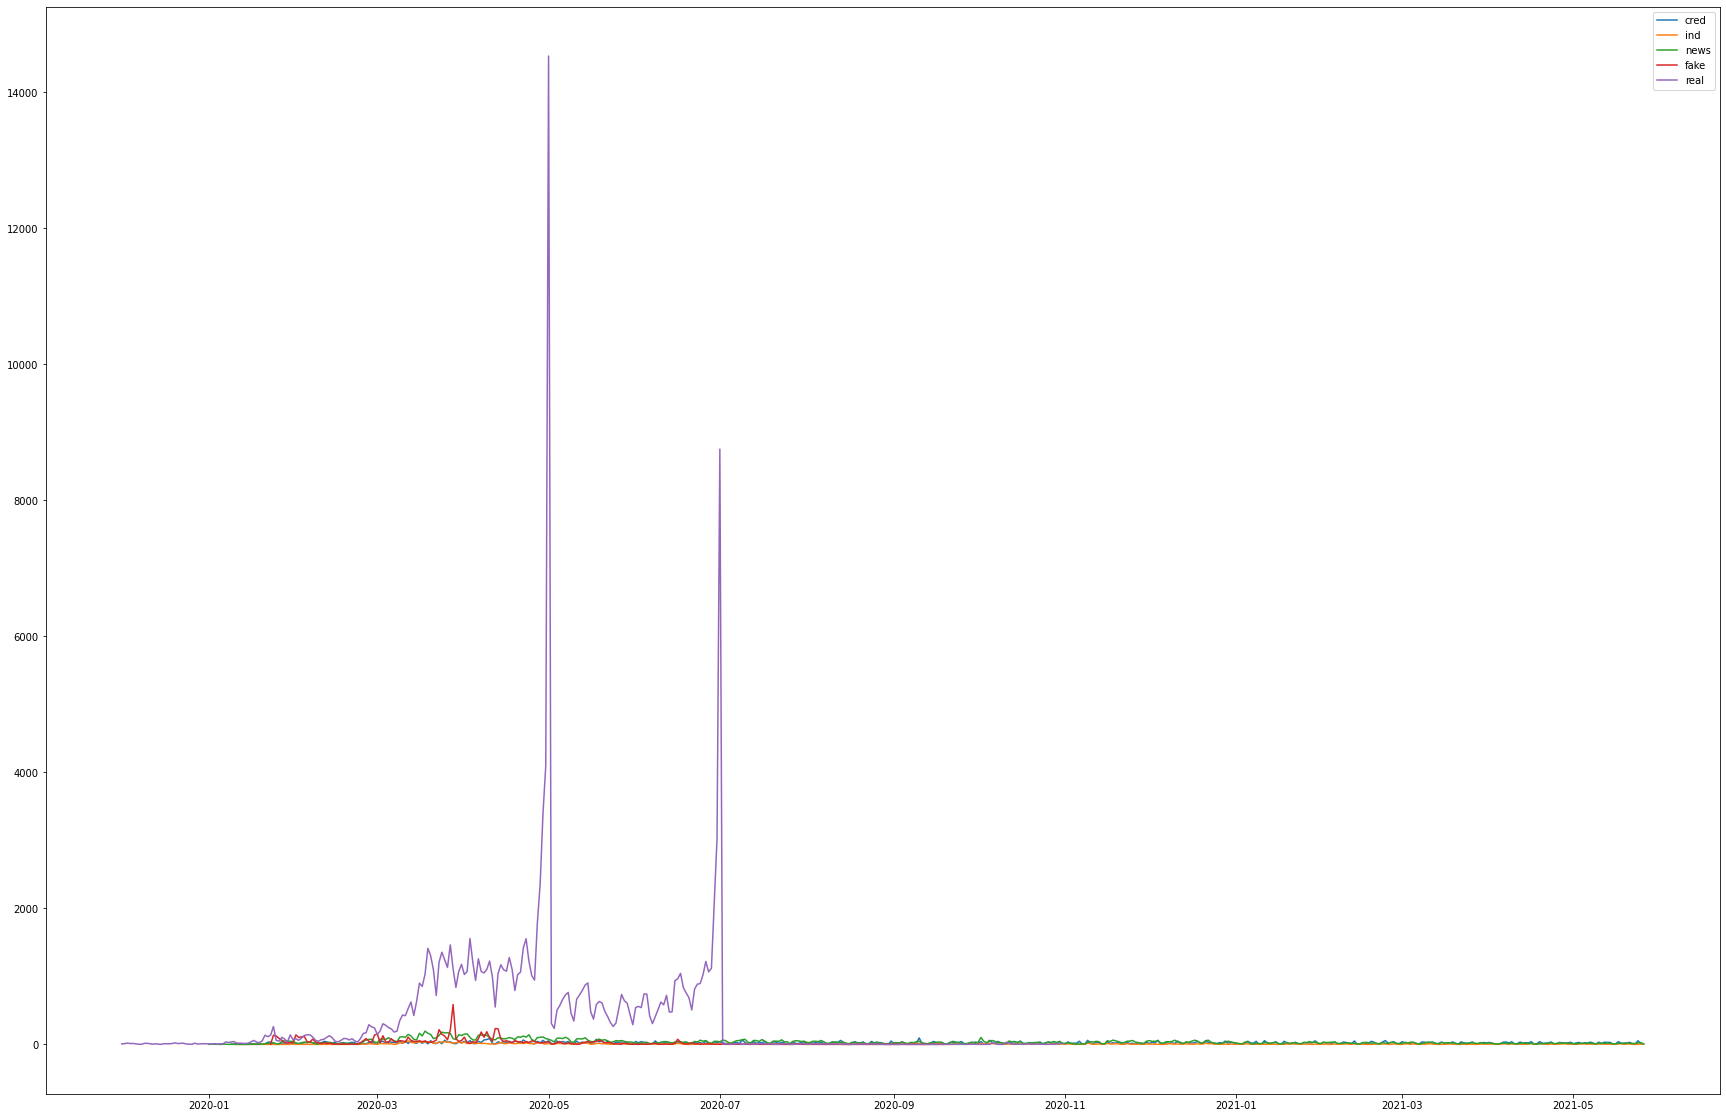

In [18]:
healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts()
ind_dates = ind_df.sort_values("date", ascending=True)["date"].value_counts()
news_dates = news_df.sort_values("date", ascending=True)["date"].value_counts()

fake_tweets = fake_dfs.sort_values("date", ascending=True)["date"].value_counts()
real_tweets = real_dfs.sort_values("date", ascending=True)["date"].value_counts()

plt.figure(figsize=[30, 20])
healthorg_dates.sort_index().plot()
ind_dates.sort_index().plot()
news_dates.sort_index().plot()
fake_tweets.sort_index().plot()
real_tweets.sort_index().plot()
plt.legend(["cred", "ind", "news", "fake", "real"])

In [19]:
# ideas to move forward with
# --> moving average
# --> time series forecasting



In [20]:
# exploring engagement

healthorg_engagement = healthorg_df[["replies_count", "retweets_count", "likes_count"]]
stats_healthorg_engagement = healthorg_engagement.sum()
total_healthorg_engagement = stats_healthorg_engagement.sum()

weight_healthorg_engagement = stats_healthorg_engagement / total_healthorg_engagement

healthorg_reply_score = stats_healthorg_engagement[0] * weight_healthorg_engagement[0]
healthorg_retweet_score = stats_healthorg_engagement[1] * weight_healthorg_engagement[1]
healthorg_likes_score = stats_healthorg_engagement[2] * weight_healthorg_engagement[2]

healthorg_score = (healthorg_reply_score + healthorg_retweet_score + healthorg_likes_score) / 3

# get total followers
file = pd.read_csv("healthorg_followers", usecols=[0, 1])
healthorg_followers = file["followers"].sum()

healthorg_engagement_score = healthorg_score / healthorg_followers
healthorg_engagement_score

# run by one of the mentors! --> Mark Ebden <3

0.07153213497839178

In [21]:
# exploring individual engagement

ind_engagement = ind_df[["replies_count", "retweets_count", "likes_count"]]
stats_ind_engagement = ind_engagement.sum()
total_ind_engagement = stats_ind_engagement.sum()

weight_ind_engagement = stats_ind_engagement / total_ind_engagement

ind_reply_score = stats_ind_engagement[0] * weight_ind_engagement[0]
ind_retweet_score = stats_ind_engagement[1] * weight_ind_engagement[1]
ind_likes_score = stats_ind_engagement[2] * weight_ind_engagement[2]

ind_score = (ind_reply_score + ind_retweet_score + ind_likes_score) / 3

# get total followers
file = pd.read_csv("ind_followers", usecols=[0, 1])
ind_followers = file["followers"].sum()

ind_engagement_score = ind_score / ind_followers
ind_engagement_score

0.0654288253981638

In [23]:
# exploring individual engagement

news_engagement = news_df[["replies_count", "retweets_count", "likes_count"]]
stats_news_engagement = news_engagement.sum()
total_news_engagement = stats_news_engagement.sum()

weight_news_engagement = stats_news_engagement / total_news_engagement

news_reply_score = stats_news_engagement[0] * weight_news_engagement[0]
news_retweet_score = stats_news_engagement[1] * weight_news_engagement[1]
news_likes_score = stats_news_engagement[2] * weight_news_engagement[2]

news_score = (news_reply_score + news_retweet_score + news_likes_score) / 3

# get total followers
file = pd.read_csv("news_followers", usecols=[0, 1])
news_followers = file["followers"].sum()

news_engagement_score = news_score / news_followers
news_engagement_score

0.04910814767411608